In [1]:
import anndata as ad
import numpy as np
import scanpy as sc 

from core.preprocessor import Preprocessor
from core.normalizer import Normalizer
from core.differentiator import Differentiator
from core.model_tester import ModelTester
from core.categorizer import Categorizer
from plotmodules.norm_plots import *

CT_COUNTS_META_PATH = 'ct_counts_public_meta.h5ad'

ct_counts_metadata = ad.read_h5ad(CT_COUNTS_META_PATH)


In [2]:
cat = Categorizer(True)
ct_counts_metadata = ct_counts_metadata[(ct_counts_metadata.obs['cogdx'].isin([4, 5]) & ct_counts_metadata.obs['braaksc'].isin([4, 5, 6])) | 
                                        (ct_counts_metadata.obs['cogdx'].isin([1]) & ct_counts_metadata.obs['braaksc'].isin([0, 1, 2, 3]))]
cat.categorize(ct_counts_metadata, 'cogdx', cat.COGDX_MAP)

ct_counts_metadata.obs

/home/jacob/Documents/BEP/bsc-thesis-scripts/core/categorizer.py:26: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


,Study,msex,educ,race,spanish,apoe_genotype,age_at_visit_max,age_first_ad_dx,age_death,cts_mmse30_first_ad_dx,cts_mmse30_lv,pmi,braaksc,ceradsc,cogdx,dcfdx_lv,individualID,projid,cogdx_cat,cogdx_catcode
projid,,,,,,,,,,,,,,,,,,,,
6107196,MAP,1.0,15.0,1.0,2.0,33.0,90+,NaN,90+,NaN,22.0,4.166667,5.0,1.0,4.0,4.0,R9033345,6107196,AD,0
7253015,MAP,0.0,12.0,1.0,2.0,34.0,87.649555099247095,86.655715263518132,88.528405201916499,24.0,23.0,4.166667,5.0,2.0,4.0,4.0,R2264515,7253015,AD,0
7265221,MAP,0.0,18.0,1.0,2.0,34.0,90+,90+,90+,23.0,14.0,5.750000,4.0,1.0,4.0,4.0,R5629689,7265221,AD,0
8109170,MAP,0.0,16.0,1.0,2.0,23.0,87.619438740588635,NaN,88.087611225188226,NaN,27.0,5.450000,3.0,2.0,1.0,1.0,R9489952,8109170,H,1
9841821,MAP,1.0,16.0,1.0,2.0,34.0,81.941136208076657,NaN,82.855578370978776,NaN,0.0,4.300000,6.0,1.0,4.0,4.0,R7583108,9841821,AD,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87645445,MAP,0.0,12.0,1.0,2.0,34.0,90+,NaN,90+,NaN,3.0,6.683333,5.0,1.0,4.0,4.0,R5573393,87645445,AD,0
87779516,MAP,0.0,15.0,1.0,2.0,33.0,90+,NaN,90+,NaN,28.0,5.333333,3.0,4.0,1.0,1.0,R6392007,87779516,H,1
95491648,MAP,1.0,19.0,1.0,2.0,33.0,85.587953456536624,NaN,85.796030116358665,NaN,27.0,5.583333,3.0,4.0,1.0,1.0,R5259690,95491648,H,1


In [3]:
ct_counts_metadata.X

array([[  0.,   8.,  35., ...,   5.,   0.,   1.],
       [  2.,  20., 225., ...,  12.,   3.,   6.],
       [534., 211., 102., ...,  21.,   5.,   6.],
       ...,
       [ 97.,  45.,   6., ...,  12.,   1.,   3.],
       [  2.,  30.,  66., ...,  10.,   1.,   0.],
       [ 32.,  89., 655., ...,  13.,   2.,   1.]])

In [4]:
normalizer = Normalizer(['l1'], None)
normalizer.normalize_all(ct_counts_metadata, True)

In [5]:
ct_counts_metadata.layers['norm_l1']

array([[  0.        ,  40.26170106, 176.14494212, ...,  25.16356316,
          0.        ,   5.03271263],
       [  4.44148346,  44.41483455, 499.66688874, ...,  26.64890073,
          6.66222518,  13.32445037],
       [787.61061947, 311.20943953, 150.44247788, ...,  30.97345133,
          7.37463127,   8.84955752],
       ...,
       [171.07583774,  79.36507937,  10.58201058, ...,  21.16402116,
          1.76366843,   5.29100529],
       [  3.89711613,  58.45674201, 128.60483242, ...,  19.48558067,
          1.94855807,   0.        ],
       [ 41.32765078, 114.94252874, 845.92535193, ...,  16.78935813,
          2.58297817,   1.29148909]])

In [6]:
total_counts_per_sample = np.zeros((ct_counts_metadata.X.shape[0], 1))

In [13]:
for i in range(ct_counts_metadata.X.shape[0]):
    total_counts_per_sample[i] = np.sum(ct_counts_metadata.layers['norm_l1'][i])
    
total_counts_per_sample

array([[10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.],
       [10000.

In [8]:
total_ct_counts = pd.DataFrame({'total_counts': total_counts_per_sample.flatten(), 'cogdx_catcode': ct_counts_metadata.obs['cogdx_catcode']})
total_ct_counts_adata = ad.AnnData(total_counts_per_sample, ct_counts_metadata.obs)

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

                 Generalized Linear Model Regression Results                  
Dep. Variable:          cogdx_catcode   No. Observations:                  212
Model:                            GLM   Df Residuals:                      211
Model Family:                Gaussian   Df Model:                            0
Link Function:               Identity   Scale:                         0.25038
Method:                          IRLS   Log-Likelihood:                -153.53
Date:                Thu, 06 Jun 2024   Deviance:                       52.830
Time:                        17:25:14   Pearson chi2:                     52.8
No. Iterations:                     3   Pseudo R-squ. (CS):          1.116e-05
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.717e-09   3.44e-10     13.726   

,total_counts,cogdx_catcode,fittedvalues
projid,,,
6107196,10000.0,0,0.471698
7253015,10000.0,0,0.471698
7265221,10000.0,0,0.471698
8109170,10000.0,1,0.471698
9841821,10000.0,0,0.471698
...,...,...,...
87645445,10000.0,0,0.471698
87779516,10000.0,1,0.471698
95491648,10000.0,1,0.471698


{'whiskers': [<matplotlib.lines.Line2D at 0x78ca31a624a0>,
 'caps': [<matplotlib.lines.Line2D at 0x78ca31a629e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x78ca31a62200>,
 'medians': [<matplotlib.lines.Line2D at 0x78ca31a62f20>,
 'fliers': [<matplotlib.lines.Line2D at 0x78ca31a631c0>,
 'means': []}

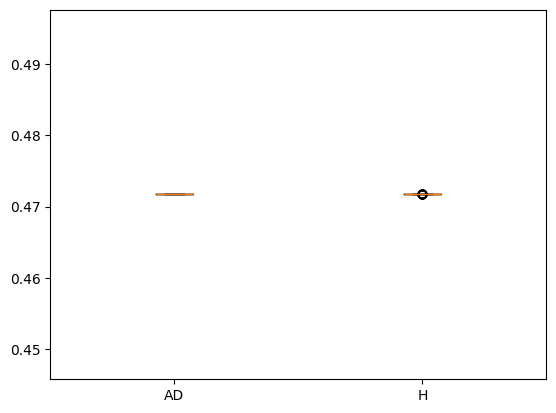

In [10]:
m = smf.glm('cogdx_catcode ~ total_counts', total_ct_counts).fit()

total_ct_counts['fittedvalues'] = m.fittedvalues

print(m.summary())

display(total_ct_counts)

boxplot = [total_ct_counts[total_ct_counts.cogdx_catcode == 0].fittedvalues, total_ct_counts[total_ct_counts.cogdx_catcode == 1].fittedvalues]

import matplotlib.pyplot as plt
plt.boxplot(boxplot, labels=['AD', 'H'])

In [11]:
total_ct_counts.corr('spearman')

,total_counts,cogdx_catcode,fittedvalues
total_counts,1.000000,-0.017604,1.000000
cogdx_catcode,-0.017604,1.000000,-0.017604
fittedvalues,1.000000,-0.017604,1.000000


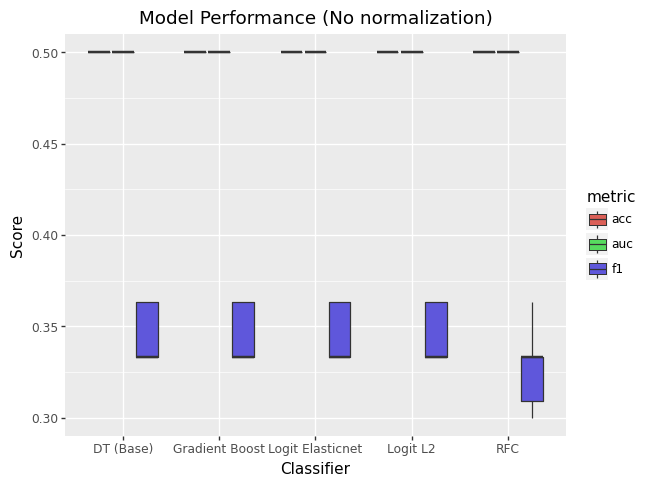

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

tester = ModelTester(None, DecisionTreeClassifier(max_depth=10), 'cogdx_catcode', [0, 1], 15, random_state=42, verbose=False)
tester.test_baseline(total_ct_counts_adata, 'DT (Base)')
tester.test_models(total_ct_counts_adata, 
                   [RandomForestClassifier(class_weight='balanced'), GradientBoostingClassifier(), LogisticRegression('elasticnet', solver='saga', l1_ratio=0.0, max_iter=10000), LogisticRegression(penalty=None)], 
                   ['RFC', 'Gradient Boost', 'Logit Elasticnet', 'Logit L2'])
tester.plot_results('Model Performance (No normalization)')